# Boosting Assignment

---
## 1. What is Boosting in Machine Learning? Explain how it improves weak learners.

**Boosting** is an **ensemble learning technique** that combines multiple **weak learners** (models that perform just slightly better than random guessing) to build a **strong learner** with high accuracy.

### **How it works (intuitive idea)**:

Instead of training all models independently (like in Bagging), Boosting trains models **sequentially**, where each new model tries to correct the mistakes made by the previous ones. The final prediction is made by **weighted voting (classification)** or **weighted averaging (regression)** of all the weak learners.

### **How Boosting Improves Weak Learners?**

1. **Sequential Training**:
   Each new weak learner focuses more on the **hard-to-classify** examples (the ones where previous learners failed).

2. **Reweighting Data Points**:

   * Initially, all samples have equal weights.
   * After each round, misclassified samples are given **higher weights**, making the next learner pay more attention to them.

3. **Model Combination**:

   * Each weak learner gets a weight based on its accuracy.
   * The final prediction is the **weighted sum of all learners**, which balances errors and improves performance.

### **Example (AdaBoost idea in simple terms)**

* Start with a weak model (e.g., a shallow decision tree).
* Check which points are misclassified.
* Increase their weights so the next tree focuses more on them.
* Repeat for several rounds.
* Combine all trees’ predictions using weighted voting.

This way, a set of weak models (like small trees) comes together to make a **very strong predictive model**.

---
## 2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

### **1. AdaBoost (Adaptive Boosting)**

* **Idea**: Adjusts the **weights of training samples**.
* **Training Process**:

  1. Train a weak learner (e.g., decision stump).
  2. Assign higher weights to **misclassified samples** so that the next learner focuses on them.
  3. Combine learners with **weights based on their accuracy**.
* **Error Handling**: Focuses directly on **hard-to-classify samples** by reweighting them.

### **2. Gradient Boosting**

* **Idea**: Learns by **minimizing the loss function** using gradient descent.
* **Training Process**:

  1. Start with an initial prediction (like the mean for regression).
  2. Calculate the **residuals (errors)** = actual − predicted.
  3. Train the next weak learner to predict these residuals (the gradient of the loss).
  4. Add this learner’s predictions to the model in a step-wise manner.
* **Error Handling**: Focuses on **correcting prediction errors** by following the **gradient of the loss function**, not just reweighting samples.

### **Key Difference**

* **AdaBoost**: Sequentially reweights **samples** → harder examples get more attention.
* **Gradient Boosting**: Sequentially fits learners to the **residual errors** (loss gradients) → directly reduces the overall error function.

---
## 3. How does regularization help in XGBoost?

XGBoost (**Extreme Gradient Boosting**) is an advanced implementation of Gradient Boosting.
One of the main reasons for its success is the use of **regularization**, which helps prevent **overfitting** and improves **generalization**.

### **Types of Regularization in XGBoost:**

1. **L1 Regularization (Lasso penalty)** – applied to leaf weights

   * Encourages sparsity (many leaf weights shrink to zero).
   * Helps in feature selection (irrelevant features get zero contribution).

2. **L2 Regularization (Ridge penalty)** – applied to leaf weights

   * Smooths leaf weights (avoids extremely large values).
   * Makes the model more stable and less sensitive to noise.

3. **Tree Constraints (structural regularization)**

   * `max_depth`: Limits tree depth to avoid overly complex trees.
   * `min_child_weight`: Ensures splits occur only if enough data supports them.
   * `gamma`: Minimum loss reduction required to make a further split.

### **How Regularization Helps?**

* **Controls Model Complexity**: Prevents trees from growing too deep or assigning very large weights to leaves.
* **Reduces Overfitting**: Keeps the model from memorizing training data.
* **Improves Generalization**: Leads to better performance on unseen/test data.
* **Encourages Sparsity**: By using L1 penalty, irrelevant features get pruned out.

---
## 4. Why is CatBoost considered efficient for handling categorical data?

### **Problem with Categorical Features**

Most ML algorithms (like XGBoost, LightGBM) require categorical features to be **preprocessed** (e.g., One-Hot Encoding or Label Encoding).

* One-Hot Encoding → increases dimensionality a lot.
* Label Encoding → imposes an **artificial order** that may not make sense.

### **How CatBoost Solves This**

CatBoost introduces a **special encoding technique** for categorical features called **“Ordered Target Statistics” (a.k.a. Ordered Encoding)**.

* Instead of directly replacing categories with average target values (which can cause target leakage), CatBoost uses **permutations of the dataset** to encode categories **based only on past information**, avoiding leakage.
* Example: If predicting whether a customer buys (1) or not (0), the category “City = Delhi” will be encoded using the **average label of Delhi from previous samples only**, not the whole dataset.

### **Other Efficiency Features**

* **Handles high-cardinality categorical features well** (e.g., thousands of categories).
* **Less preprocessing needed** → You can feed raw categorical data directly.
* **Symmetric Tree Structure** → Faster training and better memory efficiency.
* **Reduces Overfitting** → Thanks to ordered encoding + random permutations.

### **Benefits**

* Saves time by eliminating the need for heavy preprocessing.
* More accurate representation of categorical variables.
* Efficient for large datasets with many categorical features.

---
## 5. What are some real-world applications where boosting techniques are preferred over bagging methods?

Boosting methods (like AdaBoost, Gradient Boosting, XGBoost, CatBoost, LightGBM) are often chosen when the task needs **high accuracy, interpretability of feature importance, and the ability to handle complex relationships**.

### **1. Finance & Banking**

* **Credit Scoring**: Predicting whether a loan applicant will default.
* **Fraud Detection**: Identifying unusual transaction patterns.
* 🔑 Why Boosting? → Captures subtle patterns in imbalanced datasets better than bagging.

### **2. Healthcare**

* **Disease Prediction**: Predicting diabetes, cancer risk, heart disease.
* **Medical Image Classification**: Detecting anomalies in scans.
* 🔑 Why Boosting? → Handles noisy and imbalanced medical datasets with higher precision.

### **3. Marketing & E-commerce**

* **Customer Churn Prediction**: Finding customers likely to stop using a service.
* **Product Recommendation Systems**: Predicting what a customer is likely to buy.
* 🔑 Why Boosting? → Learns complex customer behavior patterns better than bagging.

### **4. Cybersecurity**

* **Spam Email Detection**
* **Intrusion Detection Systems (IDS)**
* 🔑 Why Boosting? → Handles rare but critical attack patterns more effectively.

### **5. Competitions & Industry Benchmarks**

* **Kaggle Competitions**: Boosting (especially XGBoost, LightGBM, CatBoost) is often the **go-to choice** because it consistently achieves top leaderboard scores.
* 🔑 Why Boosting? → High accuracy and flexibility with feature types.

### **Key Difference in Choice**

* **Bagging (e.g., Random Forest)**: Better when interpretability and stability are needed, works well with noisy features.
* **Boosting (e.g., XGBoost, CatBoost)**: Preferred when **highest accuracy** is the priority, especially with **imbalanced or complex datasets**.

---
## 6. Write a Python program to:
> * #### Train an AdaBoost Classifier on the Breast Cancer dataset
> * #### Print the model accuracy

In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)

AdaBoost Classifier Accuracy: 0.9649122807017544


---
## 7. Write a Python program to:
> * #### Train a Gradient Boosting Regressor on the California Housing dataset
> * #### Evaluate performance using R-squared score

In [2]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared score:", r2)

Gradient Boosting Regressor R-squared score: 0.8004451261281281


---
## 8. Write a Python program to:
> * #### Train an XGBoost Classifier on the Breast Cancer dataset
> * #### Tune the learning rate using GridSearchCV
> * #### Print the best parameters and accuracy

In [3]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("XGBoost Classifier Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.2}
XGBoost Classifier Accuracy: 0.956140350877193


c:\Users\saswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:48:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


---
## 9. Write a Python program to:
> * #### Train a CatBoost Classifier
> * #### Plot the confusion matrix using seaborn

CatBoost Classifier Accuracy: 0.9649122807017544


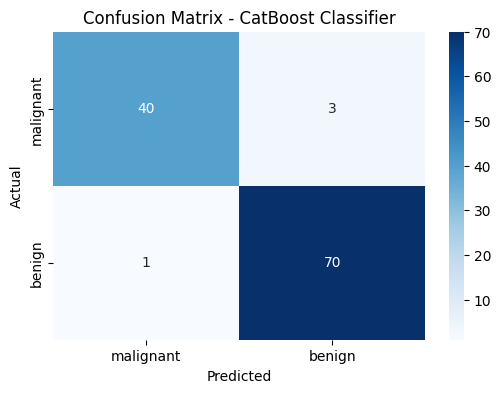

In [4]:
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Classifier (silent mode)
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Classifier Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=data.target_names,
    yticklabels=data.target_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

---
## 10. You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.The dataset is imbalanced, contains missing values, and has both numeric and categorical features.Describe your step-by-step data science pipeline using boosting techniques:
> * #### Data preprocessing & handling missing/categorical values
> * #### Choice between AdaBoost, XGBoost, or CatBoost
> * #### Hyperparameter tuning strategy
> * #### Evaluation metrics you'd choose and why
> * #### How the business would benefit from your model

### **1. Data Preprocessing**

* **Handle Missing Values**:

  * Numeric features → impute with median (robust to outliers).
  * Categorical features → impute with most frequent category or “Unknown”.
* **Handle Categorical Features**:

  * If using **CatBoost** → feed raw categorical features directly.
  * If using XGBoost/AdaBoost → use **One-Hot Encoding** (low-cardinality) or **Target Encoding** (high-cardinality).
* **Feature Scaling**: Not strictly needed for tree-based boosting models.
* **Imbalance Handling**:

  * Use **SMOTE / Random Oversampling** or
  * Use **class weights** (available in XGBoost and CatBoost).

### **2. Model Choice**

* **AdaBoost**: Works well with simple datasets, but less efficient with high-cardinality categorical features.
* **XGBoost**: Strong, flexible, handles imbalanced datasets well with `scale_pos_weight`.
* **CatBoost**: Best suited here → because the dataset has **many categorical features and missing values**, CatBoost can **natively handle them without heavy preprocessing**.

👉 **Choice**: **CatBoost Classifier** for simplicity + efficiency.

### **3. Hyperparameter Tuning**

* Use **GridSearchCV** or **RandomizedSearchCV** (or even **Bayesian Optimization** if dataset is large).
* Key hyperparameters:

  * `iterations` (number of trees)
  * `learning_rate`
  * `depth` (tree depth)
  * `l2_leaf_reg` (regularization)
  * `class_weights` (to handle imbalance)

👉 Start with random search for a broad range, then fine-tune with grid search.

### **4. Evaluation Metrics**

Since the dataset is **imbalanced (loan default cases are rare)**:

* **Primary Metric**:

  * **AUC-ROC** → measures ability to separate defaulters vs non-defaulters.
* **Secondary Metrics**:

  * **Precision, Recall, F1-score** (especially recall is crucial → catching defaulters).
  * **Confusion Matrix** to analyze false positives/false negatives.

### **5. Business Impact**

* **Reduced Risk**: Helps the company identify high-risk borrowers and adjust credit decisions.
* **Better Profitability**: Approve more loans safely while minimizing defaults.
* **Customer Insights**: Understand key features influencing defaults (age, income, spending patterns).
* **Regulatory Compliance**: Transparent risk assessment improves trust and meets financial regulations.